In [ ]:
"""
Tic Tac Toe Boad and Minimax Player
"""
import copy
import math
import random

class Set:
    def __init__(self, listing):
        #assert isinstance(listing, list),\
            #"Arguiment must be a list"
        self.element = []
        self.count = 0
        for value in listing:
            self.add(value)

    def add(self, value):
        if value not in self.element:
            self.element.append(value)
            self.count += 1

    def __getitem__(self, ndx):
        return self.element[ndx]

    def __len__(self):
        return self.count

X = 1
O = 2
EMPTY = 0


def initial_state():
    """
    Returns starting state of the board.
    """
    return [[EMPTY, EMPTY, EMPTY],
            [EMPTY, EMPTY, EMPTY],
            [EMPTY, EMPTY, EMPTY]]


def player(board):
    """
    Returns player who has the next turn on a board.
    """
    p1 = 0
    p2 = 0
    for row in board:
        for i in range(3):
            if row[i] == X:
                p1 += 1
            elif row[i] == O:
                p2 += 1
    if p2 < p1:
        return O
    else:
        return X


def actions(board):
    """
    Returns set of all possible actions (i, j) available on the board.
    """
    available = []
    i = 0
    j = 0
    while i < 3:
        if board[i][j] == EMPTY:
            available.append((i, j))
        if j < 2:
            j += 1
        else:
            j = 0
            i += 1
    return available


def result(board, action):
    """
    Returns the board that results from making move (i, j) on the board.
    """
    new = copy.deepcopy(board)
    res = player(new)
    row, col = action
    new[row][col] = res
    done = False
    if terminal(new):
      done = True
    return new, done

def make_action(board, action, player):
    """
      Returns the board that results from making move (i, j) on the board.
    """
    done = False
    new = copy.deepcopy(board)
    res = player
    row, col = action
    if board[row][col] == EMPTY:
      new[row][col] = res
      if terminal(new):
        if winner(new) == res:
          reward = 10
        elif winner(new) is None:
          reward = 5
        else: 
          reward = -10
        done = True
      else:
        reward = -1
    else: reward = -100
    return new, reward, done
  
def winner(board):
    """
    Returns the winner of the game, if there is one.
    """
    for i in range(3):
        hor = Set(board[i])
        if len(hor) == 1 and hor[0] != EMPTY:
            if hor[0] == X:
                return X
            return O
        vert = Set([board[0][i], board[1][i], board[2][i]])
        if len(vert) == 1 and vert[0] != EMPTY:
            if vert[0] == X:
                return X
            return O
    diag1 = Set([board[0][0], board[1][1], board[2][2]])
    if len(diag1) == 1 and diag1[0] != EMPTY:
        if diag1[0] == X:
            return X
        return O
    diag2 = Set([board[2][0], board[1][1], board[0][2]])
    if len(diag2) == 1 and diag2[0] != EMPTY:
        if diag2[0] == X:
            return X
        return O


def terminal(board):
    """
    Returns True if game is over, False otherwise.
    """
    if winner(board) is not None:
      return True
    for row in board:
        if EMPTY in row:
            return False
    return True
    


def utility(board):
    """
    Returns 1 if X has won the game, -1 if O has won, 0 otherwise.
    """
    if winner(board) == X:
        return 1
    elif winner(board) == O:
        return -1

    return 0

def minimax(board, player, depth = 5):
    """
    Return the Optimal action for the AI
    """
    if board == initial_state():
        return random.choice(actions(board))
    if player == X:
        moves = actions(board)
        best_move = None
        best_score = float('-inf')
        for move in moves:
            new_board, _ = result(board, move)
            score = min_play(new_board, float('-inf'), float('inf'), depth)
            if score > best_score:
                best_move = move
                best_score = score
        return best_move
    else:
        moves = actions(board)
        best_move = None
        best_score = float('inf')
        for move in moves:
            new_board, _ = result(board, move)
            score = max_play(new_board, float('-inf'), float('inf'), depth)
            if score < best_score:
                best_move = move
                best_score = score
        return best_move
        


def min_play(board, alpha, beta, depth=7):
    if terminal(board) or depth == 0:
        return utility(board)
    moves = actions(board)
    best_score = 10
    for move in moves:
        new_board, _ = result(board, move)
        best_score = min(best_score, max_play(new_board, alpha, beta, depth = depth-1))
        beta = min(beta, best_score)
        if alpha >= beta:
            break
    return best_score

def max_play(board, alpha, beta, depth = 7):
    if terminal(board) or depth == 0:
        return utility(board)
    moves = actions(board)
    best_score = -10
    for move in moves:
        new_board, _ = result(board, move)
        best_score = max(best_score, min_play(new_board, alpha, beta, depth = depth - 1))
        alpha = max(alpha, best_score)
        if beta <= alpha:
            break
    return best_score

def class_to_action(classify):
   Map = {0 : (0,0), 1 : (0, 1), 2 : (0, 2),
   3 : (1, 0), 4 : (1, 1), 5 : (1, 2), 
   6 : (2, 0), 7 : (2, 1), 8 : (2, 2),
   }
   return Map[classify]

def action_to_class(action):
  Map = {(0,0) : 0,(0, 1) : 1, (0, 2): 2,
   (1, 0) : 3, (1, 1) : 4, (1, 2) : 5,
   (2, 0) : 6, (2, 1) : 7, (2, 2) : 8,
   }
  return Map[tuple(action)]

def reset():
  return initial_state()




In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from collections import defaultdict
import random
import math
import numpy as np


class QLearningAgent:
    def __init__(self, alpha, epsilon, discount, legal_actions):
        """
        Q-Learning Agent
        Instance variables
          - self.epsilon (exploration prob)
          - self.alpha (learning rate)
          - self.discount (discount rate aka gamma)

        """

        self.actionable = legal_actions
        self._qvalues = defaultdict(lambda: defaultdict(lambda: 0))
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount
    def get_table(self):
      """
        Return Qvalues table
      """
      return self._qvalues

    def get_qvalue(self, state, action):
        """ Returns Q(state,action) """
        return self._qvalues[state][action]

    def set_qvalue(self, state, action, value):
        """ Sets the Qvalue for [state,action] to the given value """
        self._qvalues[state][action] = value

    def get_value(self, state):
        """
        Compute agent's estimate of V(s) using current q-values
        V(s) = max_over_action Q(state,action) over possible actions.
        """
        possible_actions = self.actionable.get_legal_actions(state=state)

        # If there are no legal actions, return 0.0
        if len(possible_actions) == 0:
            return 0.0

        max_value = float("-inf")
        for action in possible_actions:
          action_value = self.get_qvalue(state, action)
          if action_value > max_value:
            max_value = action_value

        return max_value

    def update(self, state, action, reward, next_state):
        """
        Update Q-Value:
           Q(s,a) := (1 - alpha) * Q(s,a) + alpha * (r + gamma * V(s'))
        """

        # agent parameters
        gamma = self.discount
        learning_rate = self.alpha
        Q_value = self.get_qvalue(state, action)
        value = self.get_value(next_state)
        Q_value = ((1 - learning_rate) * Q_value) + (learning_rate * (reward + (gamma * value)))

        self.set_qvalue(state, action, Q_value )

    def get_best_action(self, state):
        import operator
        """
        Compute the best action to take in a state (using current q-values). 
        """
        possible_actions = self.actionable.get_legal_actions(state= state)

        # If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None
        
        all_actions = {action :self.get_qvalue(state, action) for action in possible_actions}


        return max(all_actions.items(), key=operator.itemgetter(1))[0]

    def get_action(self, state):
        import numpy as np
        """
        Compute the action to take in the current state, including exploration.  
        With probability self.epsilon, we should take a random action.
            otherwise - the best policy action (self.get_best_action).
        """

        # Pick Action
        possible_actions = self.actionable.get_legal_actions(state = state)
        action = None

        # If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None
  
        # agent parameters:
        epsilon = self.epsilon
        best_action = self.get_best_action(state)
        random_choice = np.random.choice(possible_actions)
        chosen_action = np.random.choice([best_action, random_choice], p = [1-self.epsilon, self.epsilon]   )
        return chosen_action

In [ ]:
env = initial_state()
class action:
  def get_legal_actions(self, state):
    #print(state)
    act = []
    for i in range(9):
      if state[i] == 0:
        act.append(i)
    return act

In [ ]:
agent = QLearningAgent(
    alpha=0.5, epsilon=0.70, discount=0.99,
    legal_actions=action())

In [ ]:
def play_and_train(env, agent, t_max=20):
    """
    This function returns total reward
    - run a full game, actions given by agent's e-greedy policy
    - train agent using agent.update(...) whenever it is possible
    - return total reward
    """
    total_reward = 0.0
    stat = reset()
    #stat, done = result(stat, minimax(stat, 1, 300))
    stat, done = result(stat, random.choice(actions(stat)))
    s = np.reshape(stat, (1, -1))[0]
    s = tuple(s.tolist())

    for t in range(t_max):
        # get agent to pick action given state s.
        a = agent.get_action(s)
        stat, r, done = make_action(stat, class_to_action(a), 2)
        if not done:
          #stat, done = result(stat, minimax(stat, 1, 300))
          stat, done = result(stat, random.choice(actions(stat)))
        if done:
          if winner(stat) == X:
            r += -10
          elif winner(stat) is None:
            r += 5

        next_s = np.reshape(stat, (1, -1))[0]
        next_s = tuple(next_s.tolist())
        # train (update) agent for state s
        agent.update(s, a, r, next_s)

        s = next_s
        total_reward += r
        if done:
            break

    return total_reward

In [ ]:
import pandas as pd

def moving_average(x, span=100):
    return pd.DataFrame({'x': np.asarray(x)}).x.ewm(span=span).mean().values

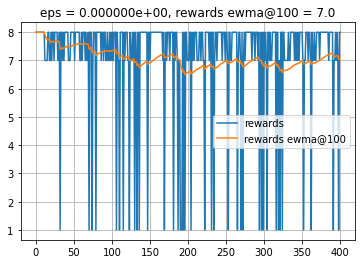

In [ ]:
from IPython.display import clear_output
rewards = []
epsilons = []
agent.epsilon = 0
for i in range(500):
    reward = play_and_train(env, agent)
    rewards.append(reward)
    epsilons.append(agent.epsilon)
    
    # OPTIONAL: <YOUR CODE: adjust epsilon>
    agent.epsilon *= 0.99

    if i % 100 == 0:
        rewards_ewma = moving_average(rewards)
        
        clear_output(True)
        plt.plot(rewards, label='rewards')
        plt.plot(rewards_ewma, label='rewards ewma@100')
        plt.legend()
        plt.grid()
        plt.title('eps = {:e}, rewards ewma@100 = {:.1f}'.format(agent.epsilon, np.mean(rewards)))
        plt.show()

In [ ]:
print(min(rewards))
print(np.percentile(rewards, 0.025 ))

-14.0
-13.999999999999998


In [ ]:
print(len(agent._qvalues))

4589


In [ ]:

import dill
with open("/content/gdrive/My Drive/tictacAgen", 'wb') as f:     
  dill.dump(agent, f)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import dill
with open("/content/gdrive/My Drive/tictacAgent", 'rb') as f:     
  agent = dill.load(f)

In [ ]:
print(sorted(rewards)[0])

1.0
